In [411]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.decomposition import PCA

In [412]:
# find average value without nan
def get_average(array):
    sum1 = 0
    elements = 0
    for i in array:
        if not np.isnan(i):
            sum1 += i
            elements += 1
    
    return sum1/elements

# replace nan by average value
def replace_nan_by_average(array, average_number):
    for en, i in enumerate(array):
        if np.isnan(i):
            array[en] = average_number
            
    return array

# draw vector :)
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    



# DATA PREPARATION


In [413]:
# load data
tit = sns.load_dataset("titanic")
age = tit['age']
fare = tit['fare']
# replace nan
age_avg = get_average(age)
age = replace_nan_by_average(age, age_avg)

fare_avg = get_average(fare)
fare = replace_nan_by_average(fare, fare_avg)

# prepare data for PCA function
X = [[x,y] for x, y in zip(age, fare)]
X = np.array(X)

#
#
# Never mind the warning
#
#

D:\Program Files\Anaconda\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


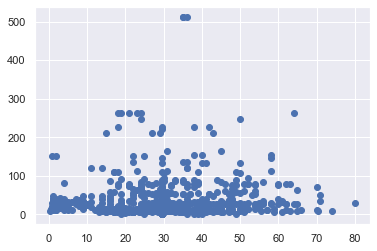

In [414]:
#plot our data
plt.scatter(X[:, 0], X[:, 1])


# PCA – principal component analysis



#  Using sklearn PCA function


In [415]:
# use sklearn PCA function
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [416]:
# pca.components_ is the set of all eigenvectors
# власні значення
print(pca.components_)
print()
print(pca.explained_variance_)

[[ 0.02569292  0.99966988]
 [ 0.99966988 -0.02569292]]

[2470.95739761  167.53184807]


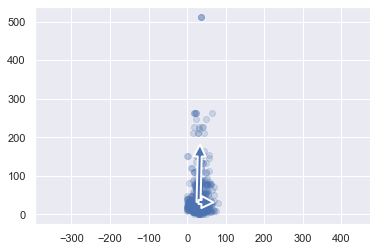

In [417]:
# Visualize PCA using sklearn

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');


# Using My PCA function written using pytorch


In [418]:
def my_PCA(X, k, center=True):
  n = X.size()[0]
  ones = torch.ones(n).view([n,1])
  # 1/n tensor
  h = ((1/n) * torch.mm(ones, ones.t())) if center  else torch.zeros(n*n).view([n,n])
  # Віднімаю від діагональної матрці з діагональними елементами рівними 1 матрицю h
  H = torch.eye(n) - h
  # множення матриць H і X
  X_center =  torch.mm(H.double(), X.double())
  # Сингулярний розклад матриці за допомогою метода svd
  u, s, v = torch.svd(X_center) 
  # Транспонування матриці v і це є наші компоненти
  components  = v[:k].t()
  # Поелементне піднесення до квадрату матриці s після чого діль елементи кінцевої матриці на (n-1)
  explained_variance = torch.mul(s[:k], s[:k])/(n-1)
  return {'components':components,     
    'explained_variance':explained_variance }

In [419]:
my_pca = my_PCA(torch.IntTensor(X), 2)
my_pca

{'components': tensor([[-0.0264, -0.9997],
         [-0.9997,  0.0264]], dtype=torch.float64),
 'explained_variance': tensor([2472.0685,  167.7506], dtype=torch.float64)}

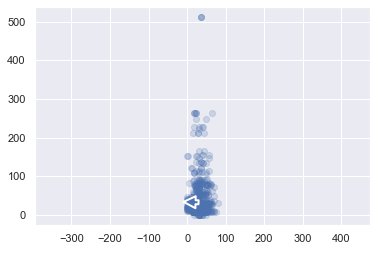

In [420]:
# visualize PCA using pytorch
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(my_pca['explained_variance'], my_pca['components']):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v.data.numpy())
plt.axis('equal');

# Завдання №2  ЗНЕШУМЛЕННЯ


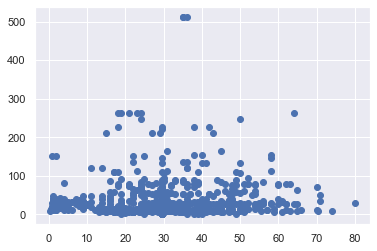

In [421]:
plt.scatter(X[:, 0], X[:, 1])

## Зашумлення

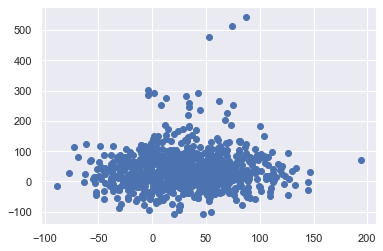

In [402]:
np.random.seed(42)
noisy = X
noisy[:, 0] = np.random.normal(X[:, 0], 40)
noisy[:, 1] = np.random.normal(X[:, 1], 40)
plt.scatter(noisy[:, 0], noisy[:, 1])

In [403]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

1

## Після Знешумлення

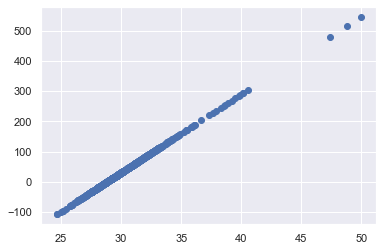

In [404]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plt.scatter(filtered[:, 0], filtered[:, 1])